# Section One - Time Series Data in Python with Pandas

## Lesson 1. Work With Datetime Format in Python - Time Series Data

In [8]:
from matplotlib.axes._axes import _log as matplotlib_axes_logger
import os
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import earthpy as et
%matplotlib notebook

In [9]:
# Handle datetime conversions between pandas and matplotlib
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

In [10]:
# Dealing with an error thrown by one of the plots
matplotlib_axes_logger.setLevel('ERROR')
import warnings
warnings.filterwarnings('ignore')

In [11]:
# Adjust font size and style of all plots in notebook with seaborn
sns.set(font_scale=1.5, style='whitegrid')

In [12]:
# Set working directory to ~/earth-analytics/data
os.chdir(os.path.join(os.path.expanduser('~'), 'earth-analytics/data'))

In [13]:
file_path = os.path.join("colorado-flood",
                        "precipitation",
                        "805325-precip-daily-2003-2013.csv")

boulder_precip_2003_2013 = pd.read_csv(file_path)
boulder_precip_2003_2013.head()

,STATION,STATION_NAME,ELEVATION,LATITUDE,LONGITUDE,DATE,HPCP,Measurement Flag,Quality Flag
0,COOP:050843,BOULDER 2 CO US,1650.5,40.03389,-105.28111,20030101 01:00,0.0,g,
1,COOP:050843,BOULDER 2 CO US,1650.5,40.03389,-105.28111,20030201 01:00,0.0,g,
2,COOP:050843,BOULDER 2 CO US,1650.5,40.03389,-105.28111,20030202 19:00,0.2,,
3,COOP:050843,BOULDER 2 CO US,1650.5,40.03389,-105.28111,20030202 22:00,0.1,,
4,COOP:050843,BOULDER 2 CO US,1650.5,40.03389,-105.28111,20030203 02:00,0.1,,


<IPython.core.display.Javascript object>


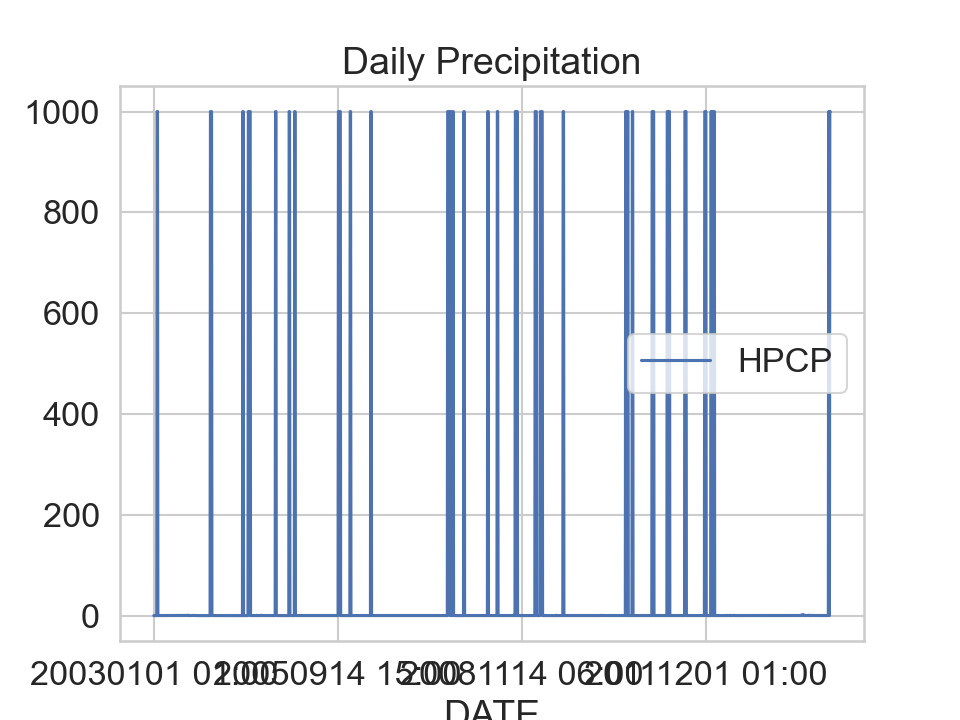

<AxesSubplot:title={'center':'Daily Precipitation'}, xlabel='DATE'>

In [14]:
boulder_precip_2003_2013.plot(x='DATE', y='HPCP', title='Daily Precipitation')

#### Time Series Data Cleaning & Exploration

The data above do not look quite right. Take some time to explore the data to better understand what you need to clean up.

In [15]:
# Look at the range of values in the HPCP column
boulder_precip_2003_2013.describe()

,ELEVATION,LATITUDE,LONGITUDE,HPCP
count,1840.0,1840.000000,1840.000000,1840.000000
mean,1650.5,40.033851,-105.281106,51.192587
std,0.0,0.000045,0.000005,220.208147
min,1650.5,40.033800,-105.281110,0.000000
25%,1650.5,40.033800,-105.281110,0.100000
50%,1650.5,40.033890,-105.281110,0.100000
75%,1650.5,40.033890,-105.281100,0.100000
max,1650.5,40.033890,-105.281100,999.990000


In [16]:
# Import data using datetime and no data value
boulder_precip_2003_2013 = pd.read_csv(file_path,
                                      # Make sure dates import in datetime format
                                      parse_dates=['DATE'],
                                      # Set DATE as index
                                      index_col=['DATE'],
                                      # Mask nodata values
                                      na_values=['999.99'])

boulder_precip_2003_2013.head()

,STATION,STATION_NAME,ELEVATION,LATITUDE,LONGITUDE,HPCP,Measurement Flag,Quality Flag
DATE,,,,,,,,
2003-01-01 01:00:00,COOP:050843,BOULDER 2 CO US,1650.5,40.03389,-105.28111,0.0,g,
2003-02-01 01:00:00,COOP:050843,BOULDER 2 CO US,1650.5,40.03389,-105.28111,0.0,g,
2003-02-02 19:00:00,COOP:050843,BOULDER 2 CO US,1650.5,40.03389,-105.28111,0.2,,
2003-02-02 22:00:00,COOP:050843,BOULDER 2 CO US,1650.5,40.03389,-105.28111,0.1,,
2003-02-03 02:00:00,COOP:050843,BOULDER 2 CO US,1650.5,40.03389,-105.28111,0.1,,


In [17]:
boulder_precip_2003_2013.describe()

,ELEVATION,LATITUDE,LONGITUDE,HPCP
count,1840.0,1840.000000,1840.000000,1746.000000
mean,1650.5,40.033851,-105.281106,0.111856
std,0.0,0.000045,0.000005,0.093222
min,1650.5,40.033800,-105.281110,0.000000
25%,1650.5,40.033800,-105.281110,0.100000
50%,1650.5,40.033890,-105.281110,0.100000
75%,1650.5,40.033890,-105.281100,0.100000
max,1650.5,40.033890,-105.281100,2.200000


In [18]:
boulder_precip_2003_2013.index

DatetimeIndex(['2003-01-01 01:00:00', '2003-02-01 01:00:00',
               '2003-02-02 19:00:00', '2003-02-02 22:00:00',
               '2003-02-03 02:00:00', '2003-02-05 02:00:00',
               '2003-02-05 08:00:00', '2003-02-06 00:00:00',
               '2003-02-07 12:00:00', '2003-02-10 13:00:00',
               ...
               '2013-12-01 01:00:00', '2013-12-03 20:00:00',
               '2013-12-04 03:00:00', '2013-12-04 06:00:00',
               '2013-12-04 09:00:00', '2013-12-22 01:00:00',
               '2013-12-23 00:00:00', '2013-12-23 02:00:00',
               '2013-12-29 01:00:00', '2013-12-31 00:00:00'],
              dtype='datetime64[ns]', name='DATE', length=1840, freq=None)

In [19]:
type(boulder_precip_2003_2013.index)

pandas.core.indexes.datetimes.DatetimeIndex

In [20]:
boulder_precip_2003_2013.reset_index()

,DATE,STATION,STATION_NAME,ELEVATION,LATITUDE,LONGITUDE,HPCP,Measurement Flag,Quality Flag
0,2003-01-01 01:00:00,COOP:050843,BOULDER 2 CO US,1650.5,40.03389,-105.28111,0.0,g,
1,2003-02-01 01:00:00,COOP:050843,BOULDER 2 CO US,1650.5,40.03389,-105.28111,0.0,g,
2,2003-02-02 19:00:00,COOP:050843,BOULDER 2 CO US,1650.5,40.03389,-105.28111,0.2,,
3,2003-02-02 22:00:00,COOP:050843,BOULDER 2 CO US,1650.5,40.03389,-105.28111,0.1,,
4,2003-02-03 02:00:00,COOP:050843,BOULDER 2 CO US,1650.5,40.03389,-105.28111,0.1,,
...,...,...,...,...,...,...,...,...,...
1835,2013-12-22 01:00:00,COOP:050843,BOULDER 2 CO US,1650.5,40.03380,-105.28110,NaN,[,
1836,2013-12-23 00:00:00,COOP:050843,BOULDER 2 CO US,1650.5,40.03380,-105.28110,NaN,],
1837,2013-12-23 02:00:00,COOP:050843,BOULDER 2 CO US,1650.5,40.03380,-105.28110,0.1,,
1838,2013-12-29 01:00:00,COOP:050843,BOULDER 2 CO US,1650.5,40.03380,-105.28110,NaN,[,


<IPython.core.display.Javascript object>


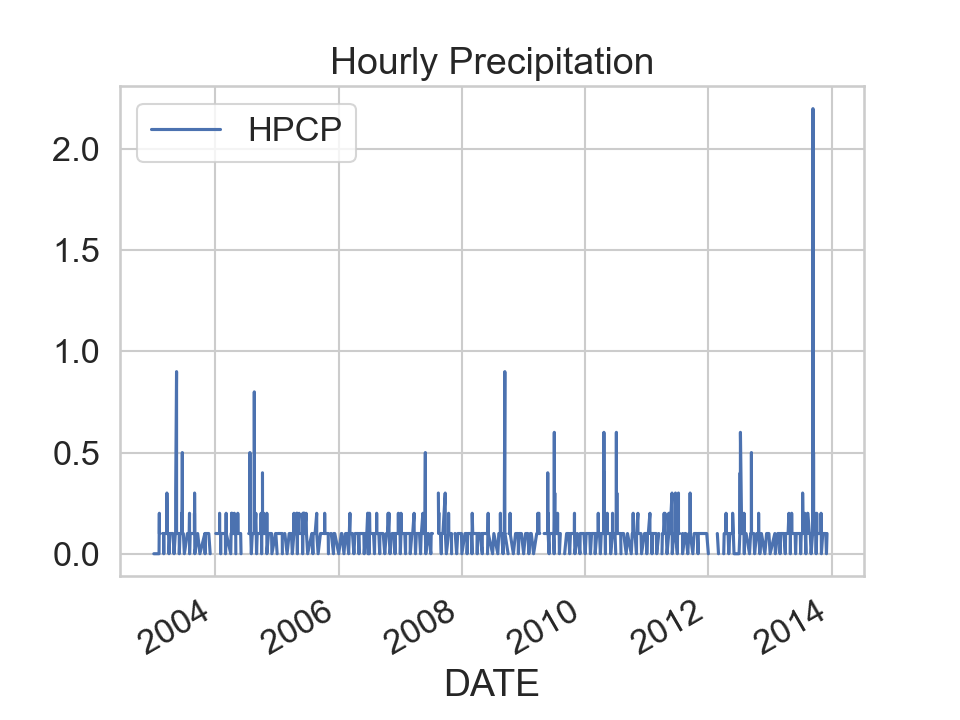

<AxesSubplot:title={'center':'Hourly Precipitation'}, xlabel='DATE'>

In [21]:
boulder_precip_2003_2013.plot(y='HPCP',
                             title='Hourly Precipitation')

In [22]:
precip_2005 = boulder_precip_2003_2013['2005']
precip_2005.head()

,STATION,STATION_NAME,ELEVATION,LATITUDE,LONGITUDE,HPCP,Measurement Flag,Quality Flag
DATE,,,,,,,,
2005-01-01 01:00:00,COOP:050843,BOULDER 2 CO US,1650.5,40.03389,-105.28111,0.0,g,
2005-01-02 06:00:00,COOP:050843,BOULDER 2 CO US,1650.5,40.03389,-105.28111,NaN,{,
2005-01-02 08:00:00,COOP:050843,BOULDER 2 CO US,1650.5,40.03389,-105.28111,NaN,},
2005-01-05 08:00:00,COOP:050843,BOULDER 2 CO US,1650.5,40.03389,-105.28111,0.1,,
2005-01-12 04:00:00,COOP:050843,BOULDER 2 CO US,1650.5,40.03389,-105.28111,0.1,,


In [23]:
# Remove missing data values
precip_2005_clean = precip_2005.dropna()

<IPython.core.display.Javascript object>


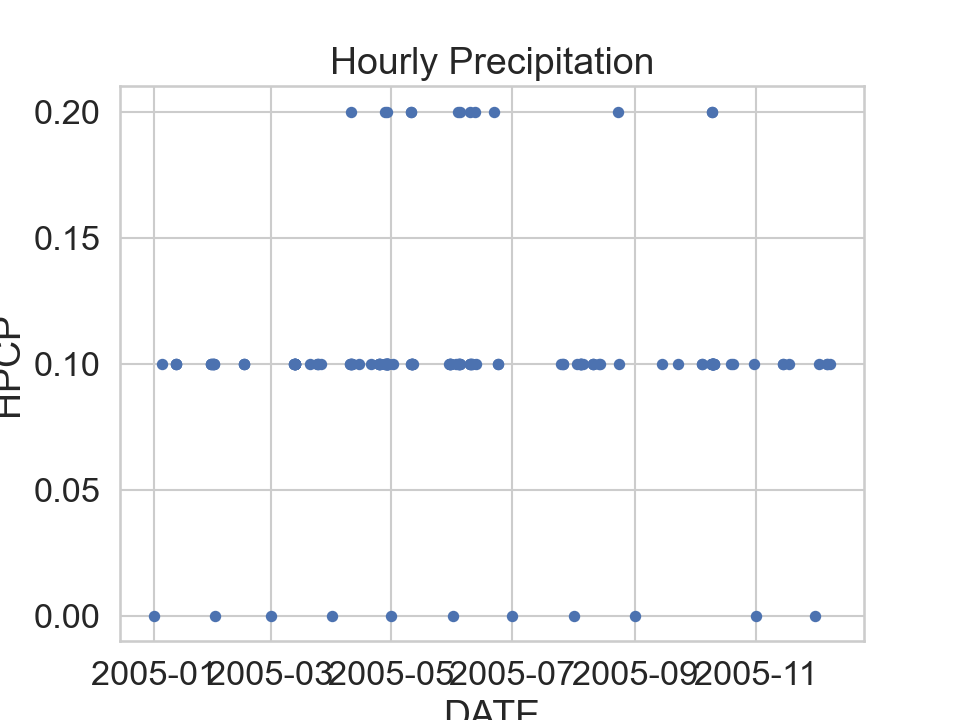

<AxesSubplot:title={'center':'Hourly Precipitation'}, xlabel='DATE', ylabel='HPCP'>

In [24]:
precip_2005_clean.reset_index().plot(x='DATE',
                                     y='HPCP',
                                     title='Hourly Precipitation',
                                     kind='scatter')

<IPython.core.display.Javascript object>


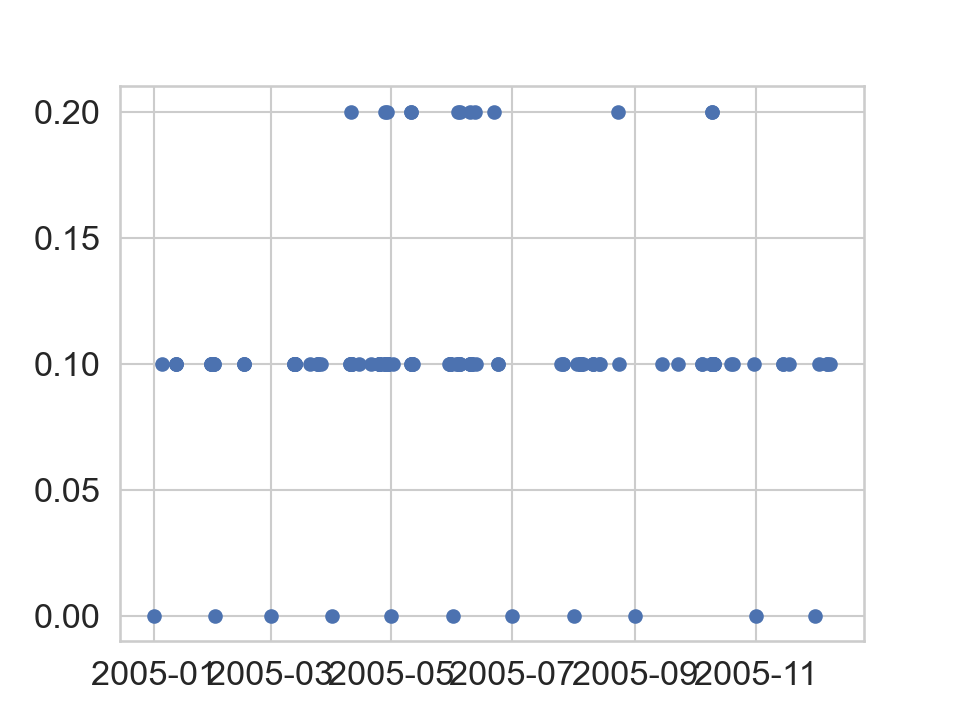

In [25]:
# Plot with matplotlib instead as it's often easier
f, ax = plt.subplots()
ax.scatter(x=precip_2005_clean.index.values,
          y=precip_2005_clean['HPCP'])

#### Resample Time Series Data

<IPython.core.display.Javascript object>


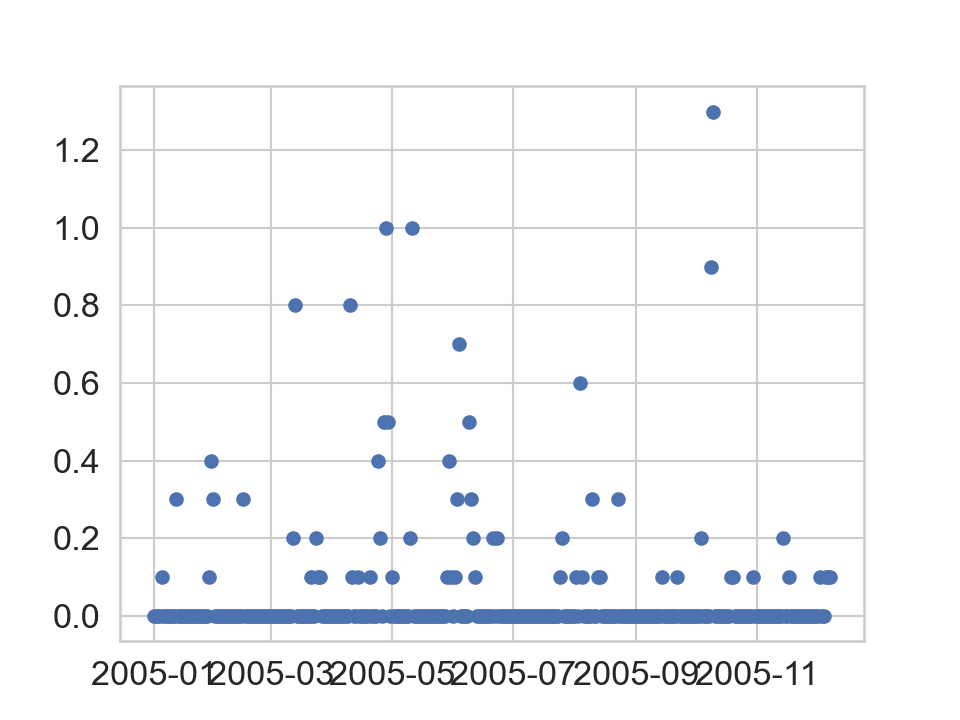

In [26]:
precip_2005_daily = precip_2005_clean.resample('D').sum()

f, ax = plt.subplots()
ax.scatter(x=precip_2005_daily.index.values,
          y=precip_2005_daily['HPCP'])

#### Challenge 2: Plot Multiple Axes

1. Create a variable that contains precipitation data from 2012 and a second variable that contains data from 2013

In [27]:
precip_2012 = boulder_precip_2003_2013['2012']
precip_2013 = boulder_precip_2003_2013['2013']
precip_2012.head()

,STATION,STATION_NAME,ELEVATION,LATITUDE,LONGITUDE,HPCP,Measurement Flag,Quality Flag
DATE,,,,,,,,
2012-01-01 01:00:00,COOP:050843,BOULDER 2 CO US,1650.5,40.0338,-105.2811,0.0,g,
2012-01-01 02:00:00,COOP:050843,BOULDER 2 CO US,1650.5,40.0338,-105.2811,NaN,{,
2012-02-01 00:00:00,COOP:050843,BOULDER 2 CO US,1650.5,40.0338,-105.2811,NaN,},
2012-02-01 01:00:00,COOP:050843,BOULDER 2 CO US,1650.5,40.0338,-105.2811,0.1,,
2012-02-22 11:00:00,COOP:050843,BOULDER 2 CO US,1650.5,40.0338,-105.2811,NaN,[,


<IPython.core.display.Javascript object>


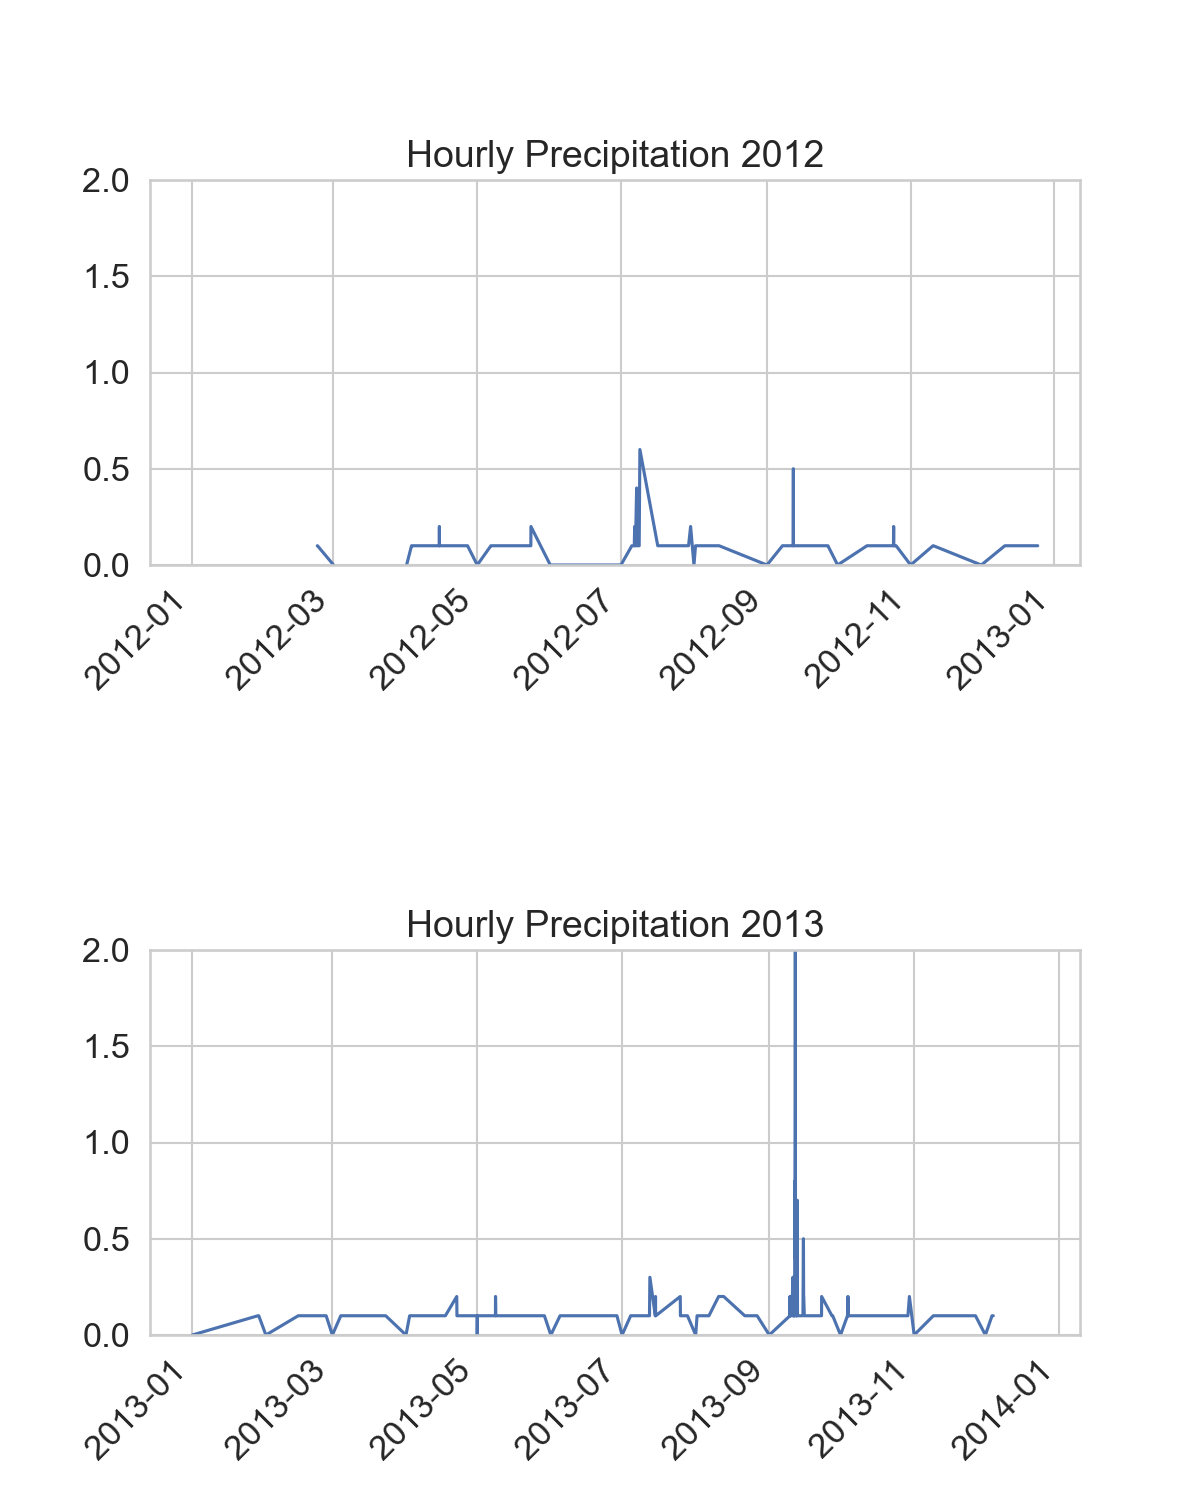

In [59]:
f, (ax1, ax2) = plt.subplots(2,1, figsize=(8,10))
ax1.plot(precip_2012.index.values,
        precip_2012['HPCP'])
ax1.set_title("Hourly Precipitation 2012")
labels1 = ax1.get_xticklabels()
ax1.set(ylim=[0, 2])
plt.setp(labels1, rotation=45, horizontalalignment='right')

ax2.plot(pd.to_datetime(precip_2013.index.values),
        precip_2013['HPCP'])
ax2.set_title("Hourly Precipitation 2013")
labels2 = ax2.get_xticklabels()
ax2.set(ylim=[0, 2])
plt.setp(labels2, rotation=45, horizontalalignment='right')

plt.subplots_adjust(hspace=1.0, wspace=1.0)

In [36]:
precip_2012.max()

STATION                 COOP:050843
STATION_NAME        BOULDER 2 CO US
ELEVATION                    1650.5
LATITUDE                    40.0338
LONGITUDE                  -105.281
HPCP                            0.6
Measurement Flag                  }
Quality Flag                       
dtype: object

In [39]:
# To get the index of the maximum value
precip_2012['HPCP'].idxmax()

Timestamp('2012-07-09 02:00:00')

In [40]:
precip_2012.loc[precip_2012['HPCP'].idxmax()]

STATION                 COOP:050843
STATION_NAME        BOULDER 2 CO US
ELEVATION                    1650.5
LATITUDE                    40.0338
LONGITUDE                  -105.281
HPCP                            0.6
Measurement Flag                   
Quality Flag                       
Name: 2012-07-09 02:00:00, dtype: object

In [37]:
precip_2013.max()

STATION                 COOP:050843
STATION_NAME        BOULDER 2 CO US
ELEVATION                    1650.5
LATITUDE                    40.0338
LONGITUDE                  -105.281
HPCP                            2.2
Measurement Flag                  g
Quality Flag                       
dtype: object

#### Challenge 4: Data Subsets

In [65]:
precip_set_oct_2013 = boulder_precip_2003_2013['2013-09-01':'2013-11-01']
precip_set_oct_2013.head()

,STATION,STATION_NAME,ELEVATION,LATITUDE,LONGITUDE,HPCP,Measurement Flag,Quality Flag
DATE,,,,,,,,
2013-09-01 01:00:00,COOP:050843,BOULDER 2 CO US,1650.5,40.0338,-105.2811,0.0,g,
2013-09-09 17:00:00,COOP:050843,BOULDER 2 CO US,1650.5,40.0338,-105.2811,0.1,,
2013-09-09 18:00:00,COOP:050843,BOULDER 2 CO US,1650.5,40.0338,-105.2811,0.1,,
2013-09-09 19:00:00,COOP:050843,BOULDER 2 CO US,1650.5,40.0338,-105.2811,0.2,,
2013-09-09 20:00:00,COOP:050843,BOULDER 2 CO US,1650.5,40.0338,-105.2811,0.1,,


In [92]:
from matplotlib import rcParams
rcParams.update({'figure.autolayout': True})

<IPython.core.display.Javascript object>


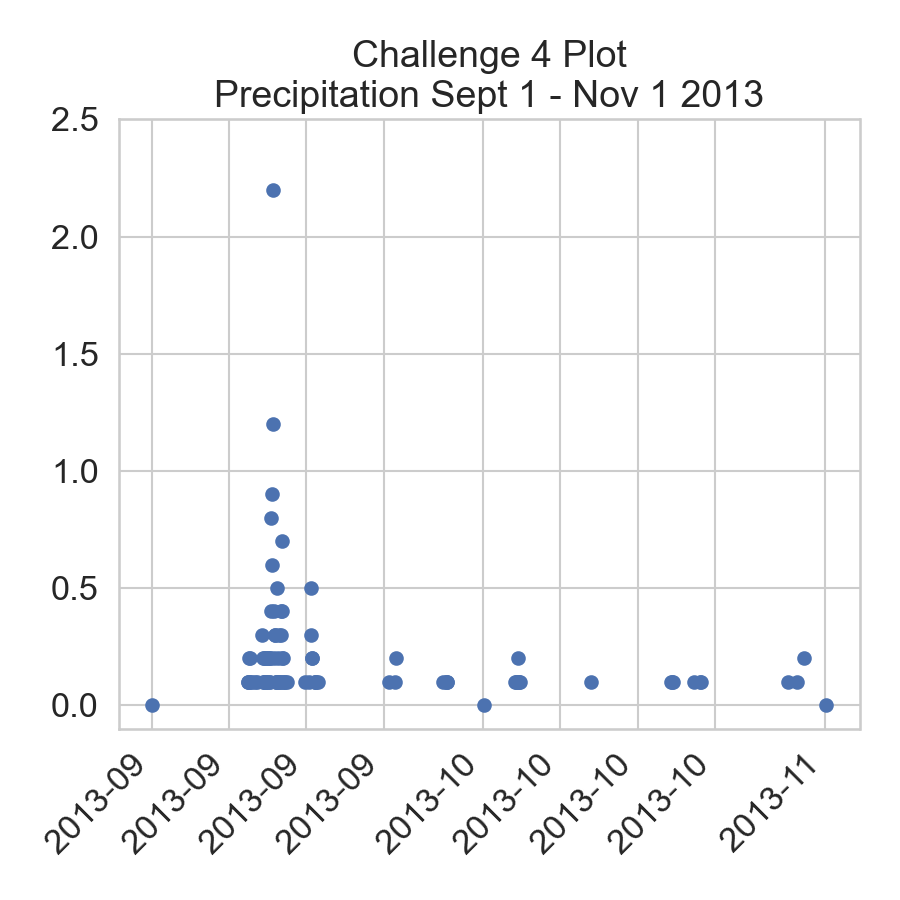

In [97]:
from matplotlib.dates import DateFormatter
f, ax = plt.subplots(figsize=(6,6))
#f.tight_layout
ax.scatter(precip_set_oct_2013.index.values,
          precip_set_oct_2013['HPCP'])
labels = ax.get_xticklabels()
ax.set_title('Challenge 4 Plot\nPrecipitation Sept 1 - Nov 1 2013')
ax.set(ylim=[-0.1, 2.5])
plt.setp(labels, rotation=45, horizontalalignment='right')
#plt.subplots_adjust(wspace=2.0)
date_form = DateFormatter('%Y-%m')
ax.xaxis.set_major_formatter(date_form)

In [76]:
help(plt.subplots_adjust)

Help on function subplots_adjust in module matplotlib.pyplot:

subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=None)
    Adjust the subplot layout parameters.
    
    Unset parameters are left unmodified; initial values are given by
    :rc:`figure.subplot.[name]`.
    
    Parameters
    ----------
    left : float, optional
        The position of the left edge of the subplots,
        as a fraction of the figure width.
    right : float, optional
        The position of the right edge of the subplots,
        as a fraction of the figure width.
    bottom : float, optional
        The position of the bottom edge of the subplots,
        as a fraction of the figure height.
    top : float, optional
        The position of the top edge of the subplots,
        as a fraction of the figure height.
    wspace : float, optional
        The width of the padding between subplots,
        as a fraction of the average axes width.
    hspace : float, optional
